# Baseline

## 1. Purpose
- Establish baseline metrics to compare with machine learning models.
- Implement and evaluate rule-based methods or simple heuristics as a baseline.
- Serve as a benchmark for evaluating model performance.

## 2. Steps

### Step 1: Define Simple Baseline Methods
#### Rule-Based Method
- we have developed a simple **rule-based classifier**:
  - Used intuitive, domain-driven rules (e.g., if-else statements based on key features).
  - Documented the reasoning behind the rules.

#### Majority Class Baseline
- Implemented a **majority class predictor**:
  - Always predict the majority class in the training data.
  - Evaluate the performance metrics (accuracy, precision, recall, etc.).

#### Random Classifier Baseline
- Implemented a **random predictor**:
  - Predicted randomly for each observation, ensuring class balance.
  - Evaluated the performance metrics.

### Step 2: Evaluate Baseline Methods
- Splitted the dataset as done for machine learning models (train-test split).
- Computed metrics for all baseline methods:
  - Accuracy, Precision, Recall, F1-Score, AUC-ROC (if applicable).
- Summarized baseline performance for comparison.

always predict the majority class

In [1]:
import pandas as pd

# Load the pre-split data
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv").squeeze()  # Use squeeze to convert DataFrame to Series
y_test = pd.read_csv("../2_data/y_test.csv").squeeze()

## Majority Class Model

In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class MajorityClassClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.majority_class_ = y.mode()[0]
        return self

    def predict(self, X):
        return np.full(shape=(len(X),), fill_value=self.majority_class_)

# Initialize and fit the majority class classifier
majority_class_clf = MajorityClassClassifier()
majority_class_clf.fit(X_train, y_train)

MajorityClassClassifier()

In [3]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Predict using the majority class classifier
y_pred = majority_class_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Save the evaluation metrics to a CSV file
evaluation_metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
evaluation_df = pd.DataFrame([evaluation_metrics])
evaluation_df.to_csv("../2_data/evaluation_metrics/Baseline_prediction.csv", index=False)


Accuracy: 0.73
Precision: 0.54
Recall: 0.73
F1 Score: 0.62
ROC AUC: 0.50


/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Rule-based model

The rules were defined by looking at the data.

In [4]:
import random
import numpy as np

def predict_using_rules_telco(training_record: pd.Series) -> int:
    """
    Predict churn using heuristic rules based on the Telco Customer Churn dataset.
    """

    # Strongest rules first (rules with high correlation to churn)
    if training_record['Tenure in Months'] < 6:
        prediction = 'churn'  # New customers are more likely to churn
    elif training_record['Monthly Charge'] > 90 and training_record['Streaming TV'] == 1:
        prediction = 'churn'  # High-paying customers using premium services may churn
    elif training_record['Senior Citizen'] == 1 and training_record['Dependents'] == 0:
        prediction = 'churn'  # Senior citizens without dependents are at risk

    # Medium-strength rules
    elif training_record['Internet Service'] == 0 and training_record['Streaming Movies'] == 0:
        prediction = 'no_churn'  # Customers without advanced services are less likely to churn
    elif training_record['Contract_Month-to-Month'] == 1 and training_record['Paperless Billing'] == 1:
        prediction = 'churn'  # Month-to-month contracts and paperless billing indicate churn risk
    elif training_record['Payment Method_Mailed Check'] == 1:
        prediction = 'churn'  # Mailed check payment is associated with higher churn rates

    # Lower-strength or fallback rules
    elif training_record['Tenure in Months'] > 60 and training_record['Contract_Two Year'] == 1:
        prediction = 'no_churn'  # Long-term customers with two-year contracts are unlikely to churn
    else:
        prediction = 'no_churn'  # Default assumption is no churn

    # Map predictions to binary labels
    mapping = {'churn': 1, 'no_churn': 0}
    return mapping[prediction]

In [5]:
# Predict using the rule-based classifier
y_pred_rule_based = X_test.apply(predict_using_rules_telco, axis=1)

# Evaluate the model
accuracy_rule_based = accuracy_score(y_test, y_pred_rule_based)
precision_rule_based = precision_score(y_test, y_pred_rule_based, average='weighted')
recall_rule_based = recall_score(y_test, y_pred_rule_based, average='weighted')
f1_rule_based = f1_score(y_test, y_pred_rule_based, average='weighted')
roc_auc_score_rule_based = roc_auc_score(y_test, y_pred_rule_based, average='weighted')

print(f'Accuracy: {accuracy_rule_based:.2f}')
print(f'Precision: {precision_rule_based:.2f}')
print(f'Recall: {recall_rule_based:.2f}')
print(f'F1 Score: {f1_rule_based:.2f}')
print(f'ROC AUC Score: {roc_auc_score_rule_based:.2f}')

# Save the evaluation metrics to a CSV file
evaluation_metrics_rule_based = {
    "accuracy": accuracy_rule_based,
    "precision": precision_rule_based,
    "recall": recall_rule_based,
    "f1": f1_rule_based,
    "roc_auc": roc_auc_score_rule_based
}
evaluation_df_rule_based = pd.DataFrame([evaluation_metrics_rule_based])
evaluation_df_rule_based.to_csv("../2_data/evaluation_metrics/BaselineRuleBased_prediction.csv", index=False)

Accuracy: 0.60
Precision: 0.79
Recall: 0.60
F1 Score: 0.61
ROC AUC Score: 0.70


## Random Classifier Model

In [6]:
class RandomClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.classes_, self.class_counts_ = np.unique(y, return_counts=True)
        self.class_probabilities_ = self.class_counts_ / self.class_counts_.sum()
        return self

    def predict(self, X):
        return np.random.choice(self.classes_, size=len(X), p=self.class_probabilities_)

# Initialize and fit the random classifier
random_clf = RandomClassifier()
random_clf.fit(X_train, y_train)

# Predict using the random classifier
y_pred_random = random_clf.predict(X_test)

# Evaluate the model
accuracy_random = accuracy_score(y_test, y_pred_random)
precision_random = precision_score(y_test, y_pred_random, average='weighted')
recall_random = recall_score(y_test, y_pred_random, average='weighted')
f1_random = f1_score(y_test, y_pred_random, average='weighted')
roc_auc_random = roc_auc_score(y_test, y_pred_random)

print(f'Accuracy: {accuracy_random:.2f}')
print(f'Precision: {precision_random:.2f}')
print(f'Recall: {recall_random:.2f}')
print(f'F1 Score: {f1_random:.2f}')
print(f'ROC AUC Score: {roc_auc_random:.2f}')

# Save the evaluation metrics to a CSV file
evaluation_metrics_random = {
    "accuracy": accuracy_random,
    "precision": precision_random,
    "recall": recall_random,
    "f1": f1_random,
    "roc_auc": roc_auc_random
}
evaluation_df_random = pd.DataFrame([evaluation_metrics_random])
evaluation_df_random.to_csv("../2_data/evaluation_metrics/BaselineRandom_prediction.csv", index=False)

Accuracy: 0.59
Precision: 0.60
Recall: 0.59
F1 Score: 0.60
ROC AUC Score: 0.49


## Evaluate Baseline Predictions

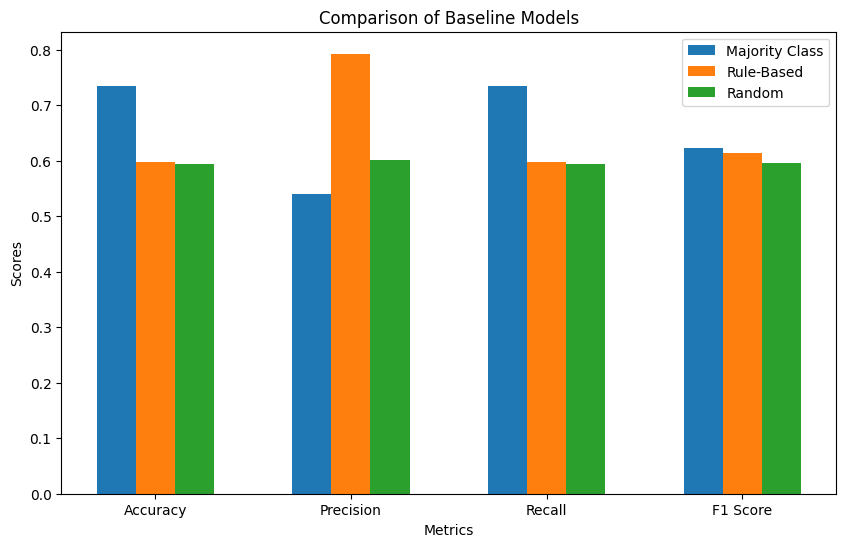

In [7]:
import matplotlib.pyplot as plt

# Data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
majority_class_scores = [accuracy, precision, recall, f1]
rule_based_scores = [accuracy_rule_based, precision_rule_based, recall_rule_based, f1_rule_based]
random_scores = [accuracy_random, precision_random, recall_random, f1_random]

# Create a bar chart for each metric
x = range(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, majority_class_scores, width, label='Majority Class')
ax.bar([p + width for p in x], rule_based_scores, width, label='Rule-Based')
ax.bar([p + width*2 for p in x], random_scores, width, label='Random')

# Set the labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Baseline Models')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.show()